Esse notebook compreende dois exercícios, o primeiro é uma regressão linear simples, analisando peso, altura e sexo de 200 pessoas

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

Vamos começar lendo os dados do arquivo .csv

In [2]:
pesos = pd.read_csv('weights.csv', sep=';')

In [3]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [4]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


In [5]:
pesos.loc[pesos.sex=='F']['weight'].max()

160

In [6]:
pesos['sex'].value_counts()

F    112
M     88
Name: sex, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C8C1AB7B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029C8C48B7B8>]], dtype=object)

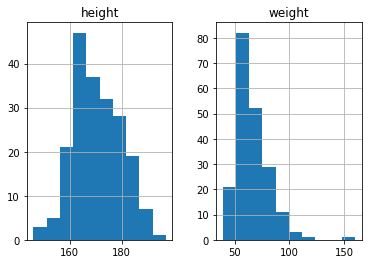

In [7]:
pesos.hist()

In [8]:
pesos.dtypes

sex       object
weight     int64
height     int64
dtype: object

In [9]:
pesos.shape

(200, 3)

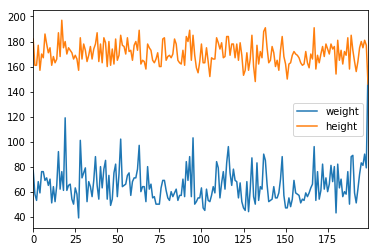

In [10]:
pesos.plot()

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe()

In [11]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


Com isso, obtemos o número de exemplos, a média de cada atributo, desvio padrão, valor mínimo, primeiro, segundo e terceiro quartil e valor máximo do atributo, respectivamente.

Para valores discretos podemos usar o método value_counts()

In [12]:
pesos.sex.value_counts()

F    112
M     88
Name: sex, dtype: int64

Nesta base temos 112 pessoas do sexo feminino e 88 do sexo masculino

Vamos visualizar esses dados graficamente

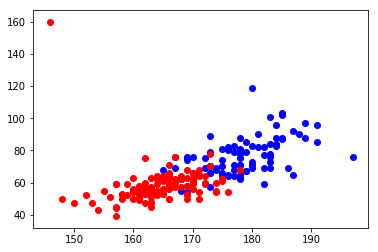

In [13]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Aqui encontramos um problema. Exitem alguns pontos muito fora da distribuição de dados (160, 120), esses pontos são os outliers. Eles podem prejudicar o modelo, porque forçarão a reta para próximo deles. Temos que removê-los.
<br>Veja também que os pesos das pessoas de sexo masculino estão deslocados para a direita, o que indica uma tendência de homens serem mais pesados que as mulheres. Nosso modelo nos mostrará isso.

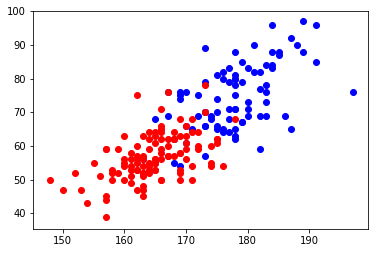

In [14]:
pesos = pesos[pesos.weight <= 100]
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Como visto em aula, para o caso de variáveis categóricas devemos utilizar "dummy variables". O método get_dummies do pandas cuida disso. Teremos um valor binário onde 1 corresponde a masculino e 0 a feminino

In [15]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [16]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
dummies_sex.head()

,M
0,1
1,0
2,0
3,1
4,0


Anexamos as novas colunas à nossa base de dados. Axis = 1 indica que queremos anexar colunas (usar 0 para linhas)

In [17]:
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


Agora que tratamos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa varável dependente (y) e as variáveis independetes (X), ou atributos.

In [33]:
X = pesos[['weight', 'height']]
y = pesos.M

In [34]:
#teste
#X = pesos[['weight', 'height']]
#y = pesos.M

In [35]:
X.head()

,weight,height
0,77,182
1,58,161
2,53,161
3,68,177
4,59,157


In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
arvore = DecisionTreeClassifier()
arvore.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Podemos visualizar os coeficientes da reta

In [37]:
lin_reg.coef_

array([ 0.01593571,  0.02416392])

In [28]:
lin_reg.intercept_

-64.776417345306569

logo, nossa equação da reta é <b>peso = sexo_Masculino x 7.9165 + altura x 0.7487 - 64.7764</b>. Nesta equação já podemos observar que se a pessoa é do sexo masculino ela tende a pesar aproximadamente 7.92 quilos a mais

Vamos plotar nossa função. Observe que como temos uma variável categórica que possui dois valores, nossa reta se comporta de forma diferente para cada sexo, deslocando 7.9165 pontos para cima se for masculino. Desta forma vamos plotar uma reta para cada sexo.

In [ ]:
heights = np.linspace(140, 210, 70)
sex_masc = np.ones(70)
sex_fem = np.zeros(70)

coef_sex = float(lin_reg.coef_[0])
coef_height = float(lin_reg.coef_[1])
intercept = float(lin_reg.intercept_)

reta_masc = coef_sex*sex_masc + coef_height*heights + intercept
reta_fem = coef_sex*sex_fem + coef_height*heights + intercept

In [ ]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_masc, '-', c='blue')
plt.plot(heights, reta_fem, '-', c='red')
plt.show()

Prevendo o peso de uma mulher de 1,57 metros

In [38]:
lin_reg.predict([[68.71, 170]])

array([ 0.49062249])

In [45]:
arvore.predict([68.71, 170])

ValueError: Expected 2D array, got 1D array instead:
array=[  68.70999908  170.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
lin_reg.predict([[45, 0]])

array([-3.99507916])

Prevendo o peso de um homem de 1,73 metros

In [ ]:
lin_reg.predict([[1, 173]])

<h4> Agora vamos analisar um exemplo mais complexo, envolvendo mais variáveis </h4>

Neste exercício vamos prever o valor mediano de uma casa na redondeza de Boston dados determinados atributos. Para isso utilizamos a base de dados 'boston.csv'

In [ ]:
data = pd.read_csv('boston.csv', sep=';', decimal=',')

Vamos analisar as 5 primeiras linhas dos nossos dados com o método head() 

In [ ]:
data.head()

Nosso conjunto de dados possui 14 colunas:<br>
    <b>CRIM</b>: taxa de crimes per capta na cidade <br>
    <b>ZN</b>: proporção de terrenos residenciais zoneada para lotes acima de 25.000<br>
    <b>INDUS</b>: proporção de zonas de negócios não varejistas na cidade<br>
    <b>CHAS</b>: proximidade ao rio Carles 1 se próximo, 0 se não<br>
    <b>NOX</b>: concentração de oxido nitrico (ppm)<br>
    <b>RM</b>: número médio de cômodos por residência<br>
    <b>AGE</b>: proporção de unidades ocupadas pelo proprietário construídas antes de 1940<br>
    <b>DIS</b>: distância ponderada aos 5 centros financeiros de Boston<br>
    <b>RAD</b>: índice de acessibilidade às rodoviais <br>
    <b>TAX</b>: taxa de imposto predial de valor integral por USS 10.000 <br>
    <b>PT</b>: relação aluno-professor por cidade<br>
    <b>B</b>: 1000 (Bk − 0,63) 2 onde Bk é a proporção de negros por cidade<br>
    <b>LSTAT</b>: menor status da população <br>
    <b>MV</b>: Valor mediano de casas ocupadas pelo proprietário em USS 1000s

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe()

In [ ]:
data.describe()

Podemos visualizar a distribuição dos dados por meio de um histograma:

In [ ]:
data.hist(bins=50, figsize=(20,15))

Agora que conhecemos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa varável dependente (y) e as variáveis independetes (X), ou atributos.

In [ ]:
y = data['MV']
X = data.drop('MV', axis=1)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

Agora que temos um modelo treinado, podemos prever o valor de um novo exemplo:

In [ ]:
x_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 
          78.900002, 4.9671, 2, 242, 17.799999, 396.899994, 9.14]]

In [ ]:
lin_reg.predict(x_new)

Também podemos prever uma lista de valores de uma única vez:

In [ ]:
X_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.900002, 4.9671, 2, 
          242, 17.799999, 396.899994, 9.14],
         [0.67671, 0.8, 5.56, 0, 0.567, 3.132, 60.678976, 2.3465, 3, 
          432,  9.546666, 342.435664, 3.23], 
         [0.05641, 0.0, 1.04, 1, 0.232, 4.322, 67.564646, 1.5678, 5, 
          567, 15.898006, 224.655678, 5.84]]

In [ ]:
lin_reg.predict(X_new)

Também é possível visualizarmos os coeficientes da reta para cada atributo

In [ ]:
lin_reg.coef_

e o valor do bias:

In [ ]:
lin_reg.intercept_

Também podemos calcular o erro médio quadrado (MSE) do nosso modelo durante o treinamento

In [ ]:
mean_squared_error(lin_reg.predict(X), y)